## DeZero 기초

### Variable Class

In [2]:
import numpy as np
from dezero import Variable

x_np = np.array(5.0)
x = Variable(x_np)

y = 3 * x ** 2
print(y)

variable(75.0)


### Function Class

In [3]:
import numpy as np
from dezero import Variable
import dezero.functions as F


a = np.array([1,2,3])
b = np.array([4,5,6])
a, b = Variable(a), Variable(b)
c = F.matmul(a, b)
print(c)

a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
c = F.matmul(a, b)
print(c)

variable(32)
variable([[19 22]
          [43 50]])


### Gradient 계산

In [4]:
import numpy as np
from dezero import Variable


def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


### Gradient Descent

In [5]:
import numpy as np
from dezero import Variable


def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

iters = 10000
lr = 0.001

for i in range(iters):
    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()

    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
#
print(x0, x1)

variable(0.9944984367782456) variable(0.9890050527419593)


## 선형회귀

### 실습 #1 - dezero3.py

Iteration 0: Loss = 37.072981601711575, W = [[0.60402384]], b = [1.20835097]
Iteration 10: Loss = 0.387211766244895, W = [[2.28760696]], b = [4.68336352]
Iteration 20: Loss = 0.2605389525645571, W = [[2.33479593]], b = [4.91003085]
Iteration 30: Loss = 0.2572834537433174, W = [[2.29359625]], b = [4.94541718]
Iteration 40: Loss = 0.2551115306853061, W = [[2.25282763]], b = [4.96691757]
Iteration 50: Loss = 0.2534546174335163, W = [[2.21693157]], b = [4.98515739]
Iteration 60: Loss = 0.25218979670819247, W = [[2.18555298]], b = [5.00106207]
Iteration 70: Loss = 0.25122428092364907, W = [[2.15813639]], b = [5.01495625]
Iteration 80: Loss = 0.25048724307877895, W = [[2.13418231]], b = [5.02709556]
Iteration 90: Loss = 0.24992461655987971, W = [[2.11325349]], b = [5.03770175]
W: [[2.09668734]]
b: [5.04609705]


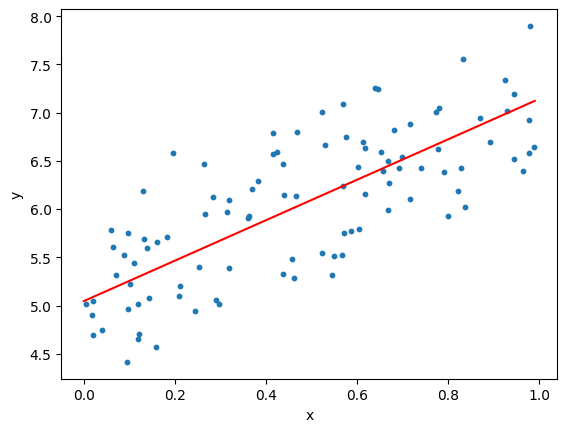

In [6]:
import numpy as np
from dezero import Variable
import dezero.functions as F
import matplotlib.pyplot as plt

#토이 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.randn(100, 1) * 0.5
x, y = Variable(x), Variable(y)

#매개변수 정의
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

# 예측함수
def predict(x):
    return F.matmul(x, W) + b
# 손실함수
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

# 경사하강법
lr = 0.1
iters = 100
for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:
        print(f"Iteration {i}: Loss = {loss.data}, W = {W.data}, b = {b.data}")


print('======')
print('W:', W.data)
print('b:', b.data)

plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

### Nonlinear Regression - MLP

0.48999576135878997
0.2041591966051219
0.20004214937558554
0.1856701355502625
0.1495740381178847
0.07250311821481263
0.019338549195117884
0.015451048779841903
0.014925162959350225
0.014529940913343533


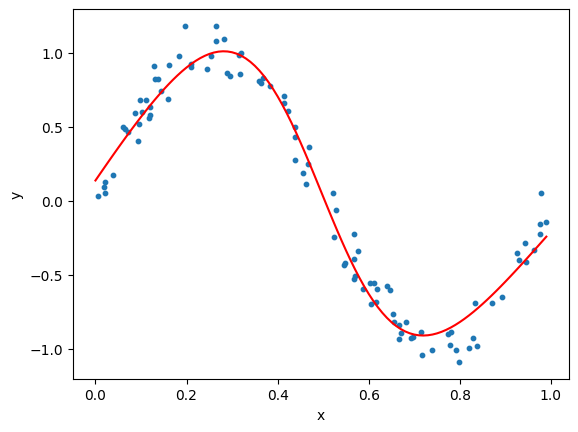

In [7]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)

# 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

# 예측함수
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

# 손실함수
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

# 경사하강법
lr = 0.2
iters = 10000
for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()

    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data

    if i % 1000 == 0:
        print(loss.data)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()



### Nonlinear Regression

In [8]:
import numpy as np
from dezero import Model
import dezero.functions as F
import dezero.layers as L

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(10, 1)

for i in range(iters):
    y_pred = model.forward(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(loss)

variable(0.8653738094509957)
variable(0.203741530503152)
variable(0.20176125724455832)
variable(0.1981634983941337)
variable(0.18417485538681536)
variable(0.10532672713966659)
variable(0.02079715090219108)
variable(0.014455317273677834)
variable(0.03125935539075449)
variable(0.013833239260065548)


### 실습 #2 - dezero3.py

variable(0.8653738094509957)
variable(0.203741530503152)
variable(0.20176125724455832)
variable(0.1981634983941337)
variable(0.18417485538681536)
variable(0.10532672713966659)
variable(0.02079715090219108)
variable(0.014455317273677834)
variable(0.03125935539075449)
variable(0.013833239260065548)


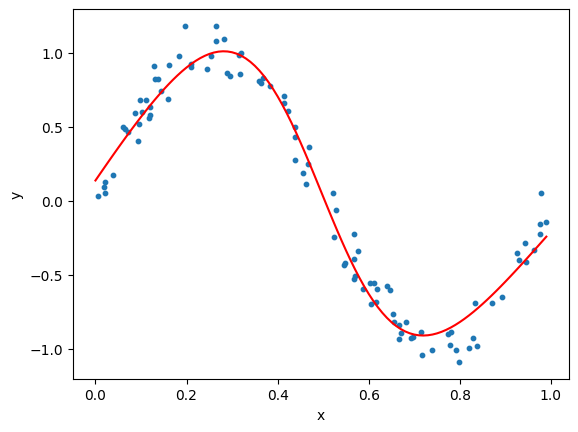

In [9]:
import numpy as np
from dezero import Model
import dezero.functions as F
import dezero.layers as L

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(10, 1)

for i in range(iters):
    y_pred = model.forward(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(loss)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()


## Q-Network

### One-Hot Vector

In [10]:
import numpy as np

def one_hot(state):
    #벡터 준비
    HEIGHT, WIDTH = 3, 4
    vec = np.zeros(HEIGHT * WIDTH, dtype=np.float32)

    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0

    return vec[np.newaxis, :]


state = (2, 0)
x = one_hot(state)

print(x.shape)
print(x)

(1, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### QNet

In [11]:
from dezero import Model
import dezero.layers as L
import dezero.functions as F

class QNet(Model):
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(100)
        self.l2 = L.Linear(4)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x


qnet = QNet()

state = (2, 0)
state = one_hot(state)

qs = qnet(state)
print(qs.shape)

(1, 4)


### 실습 #3 q_learning_nn.py

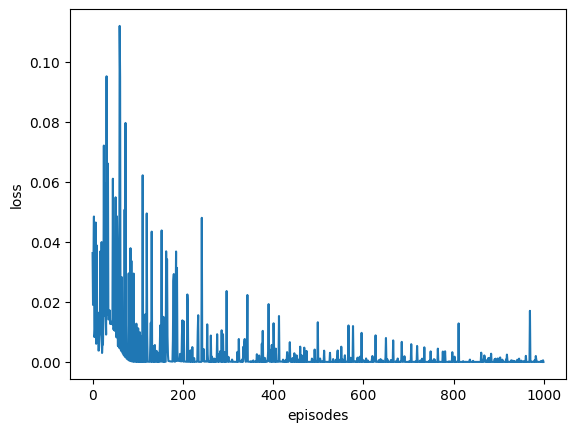

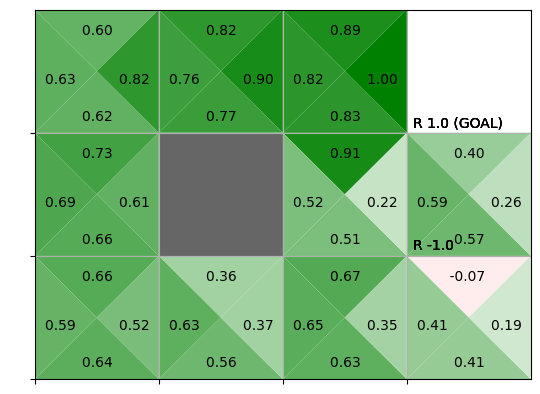

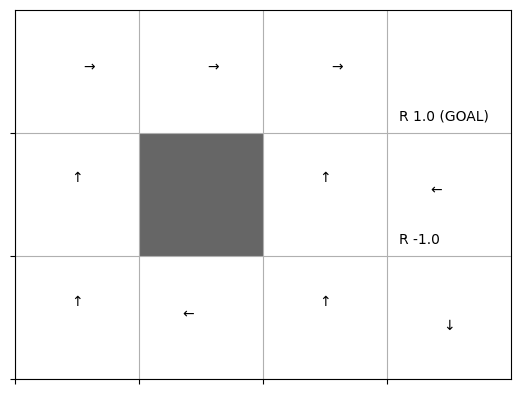

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L
from common.gridworld import GridWorld

def one_hot(state):
    #벡터 준비
    HEIGHT, WIDTH = 5, 5
    vec = np.zeros(HEIGHT * WIDTH, dtype=np.float32)

    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0

    return vec[np.newaxis, :]

class QNet(Model):
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(100)
        self.l2 = L.Linear(4)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.lr = 0.01
        self.epsilon = 0.1
        self.action_size = 4

        self.qnet = QNet()
        self.optimizer = optimizers.SGD(self.lr)
        self.optimizer.setup(self.qnet)

    def get_action(self, state_vec):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            qs = self.qnet(state_vec)
            return qs.data.argmax()


    def update(self, state, action, reward, next_state, done):
        if done:
            next_q = np.zeros(1)
        else:
            next_qs = self.qnet(next_state)
            next_q = next_qs.max(axis=1)
            next_q.unchain()

        target = self.gamma * next_q + reward

        # Q값 업데이트
        qs = self.qnet(state)
        q = qs[:, action]
        loss = F.mean_squared_error(target, q)

        self.qnet.cleargrads()
        loss.backward()
        self.optimizer.update()

        return loss.data


env = GridWorld()
agent = QLearningAgent()

episodes = 1000  # 에피소드 수
loss_history = []

for episode in range(episodes):
    state = env.reset()
    state = one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    average_loss = total_loss / cnt
    loss_history.append(average_loss)


plt.xlabel('episodes')
plt.ylabel('loss')
plt.plot(range(len(loss_history)), loss_history)
plt.show()

Q = {}
for state in env.states():
    for action in env.action_space:
        q = agent.qnet(one_hot(state))[:, action]
        Q[state, action] = float(q.data)
env.render_q(Q)